In [78]:
import pandas as pd
import numpy as np
%matplotlib inline
from statsmodels.tsa.ar_model import  AR, ARResults
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [79]:
df= pd.read_csv("data/uspopulation.csv",index_col="DATE",parse_dates=True)
df.index.freq="MS"
df

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699
...,...
2018-08-01,327698
2018-09-01,327893
2018-10-01,328077


<AxesSubplot:xlabel='DATE'>

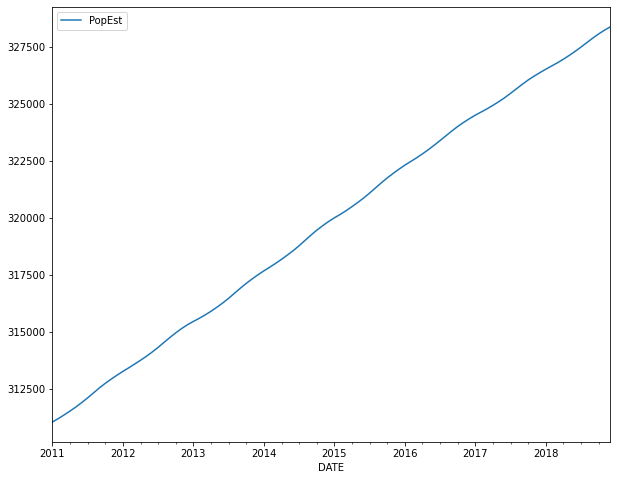

In [80]:
df.plot(figsize=(10,8))

In [81]:
len(df)

96

In [82]:
96-12

84

In [83]:
train=df.iloc[:84]
test=df.iloc[84:]

In [84]:
model=AR(train["PopEst"])

In [85]:
AR1fit=model.fit(maxlag=1)

In [86]:
AR1fit.k_ar

1

In [87]:
AR1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [88]:
start = len(train)
end=len(train)+len(test)-1

start,end

(84, 95)

In [89]:
AR1fit.predict(start=start,end=end)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [90]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [91]:
predictions1=AR1fit.predict(start=start,end=end)
predictions1=predictions1.rename("AR(1) Predictions")
predictions1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR(1) Predictions, dtype: float64

<AxesSubplot:xlabel='DATE'>

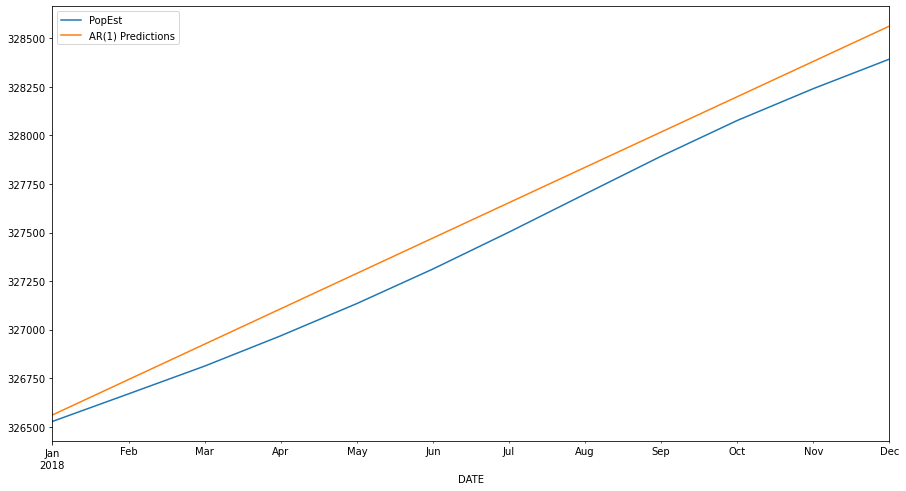

In [92]:
test.plot(figsize=(15,8),legend=True)
predictions1.plot(legend=True)

In [93]:
model=AR(train["PopEst"])
AR2fit=model.fit(maxlag=2)

In [94]:
AR2fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [95]:
predictions2=AR2fit.predict(start=start,end=end)
predictions2=predictions2.rename("AR(2) Predictions")
predictions2

2018-01-01    326535.672503
2018-02-01    326694.718510
2018-03-01    326854.882250
2018-04-01    327015.944948
2018-05-01    327177.719499
2018-06-01    327340.045896
2018-07-01    327502.787331
2018-08-01    327665.826847
2018-09-01    327829.064480
2018-10-01    327992.414809
2018-11-01    328155.804859
2018-12-01    328319.172308
Freq: MS, Name: AR(2) Predictions, dtype: float64

<AxesSubplot:xlabel='DATE'>

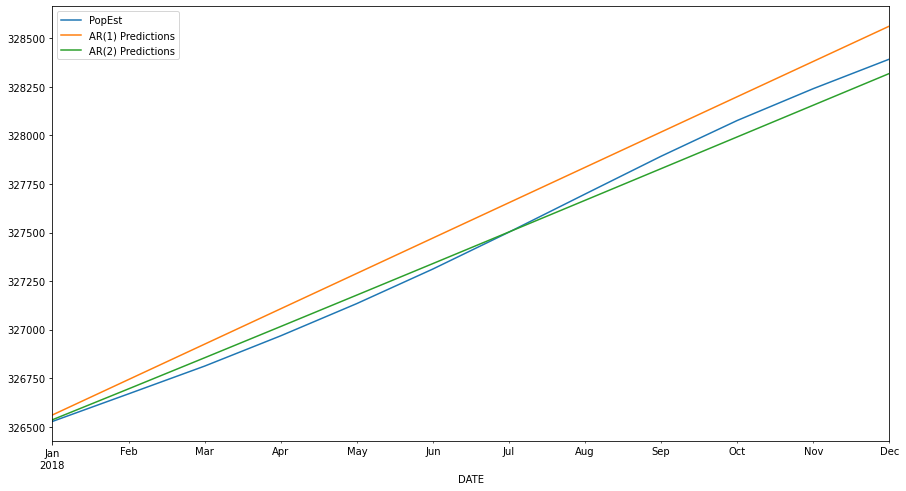

In [96]:
test.plot(figsize=(15,8),legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)

In [97]:
model=AR(train["PopEst"])
ARfit=model.fit(ic='t-stat')

In [98]:
ARfit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [99]:
predictions=ARfit.predict(start=start,end=end)
predictions=predictions.rename("AR(auto) Predictions")
predictions

2018-01-01    326523.865563
2018-02-01    326662.772583
2018-03-01    326805.746899
2018-04-01    326960.064250
2018-05-01    327130.572975
2018-06-01    327315.962832
2018-07-01    327511.010158
2018-08-01    327710.938426
2018-09-01    327907.425615
2018-10-01    328092.870853
2018-11-01    328264.133756
2018-12-01    328421.667317
Freq: MS, Name: AR(auto) Predictions, dtype: float64

<AxesSubplot:xlabel='DATE'>

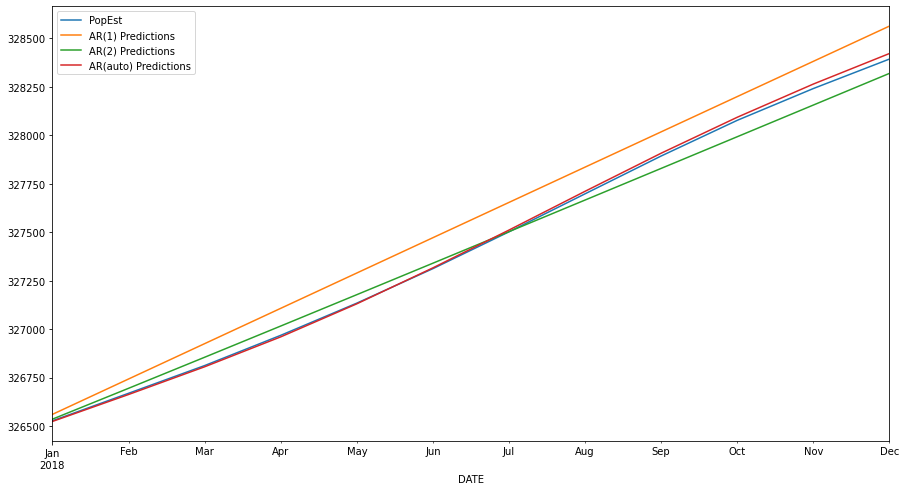

In [100]:
test.plot(figsize=(15,8),legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions.plot(legend=True)

In [101]:
labels=["AR1","AR2","AR(Auto or 8)"]
preds=[predictions1,predictions2,predictions]
for i in range(3):
    error=mean_squared_error(test["PopEst"],preds[i])
    print(f"{labels[i]} MSE error was {error}")

AR1 MSE error was 17449.714239577344
AR2 MSE error was 2713.258615675103
AR(Auto or 8) MSE error was 186.97377437908688


In [116]:
model=AR(df["PopEst"])
ARFit=model.fit(ic='t-stat')
forecasted_value=ARFit.predict(start=len(df),end=len(df)+24)

<AxesSubplot:xlabel='DATE'>

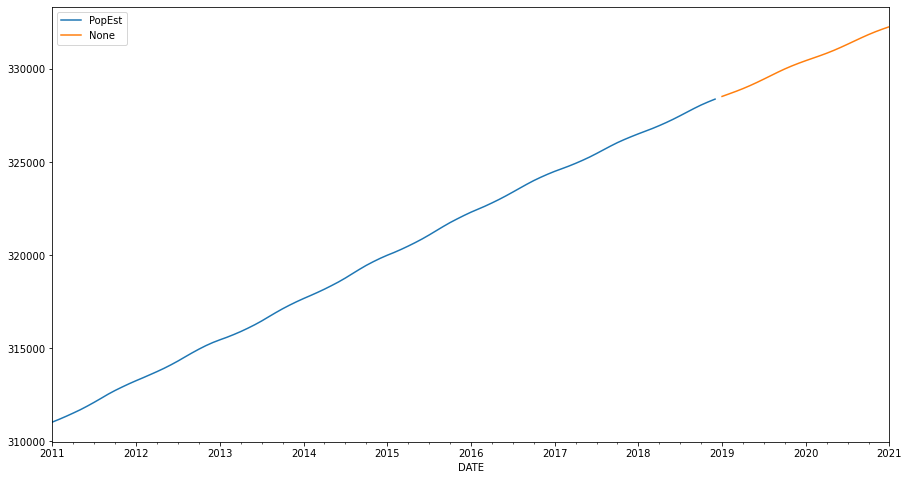

In [117]:
df["PopEst"].plot(figsize=(15,8),legend=True)
forecasted_value.plot(legend=True)